In [23]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch
from utils import calc_embeddings

In [24]:
datasets = load_datasets()

In [25]:
Counter(datasets['new_yeast'].target)

Counter({8: 244, 1: 429, 0: 463, 5: 44, 4: 35, 6: 51, 7: 168, 3: 30, 2: 20})

In [26]:
ds_name = 'new_yeast'
test_on_all_folds = False
test_all_ds = True

In [27]:
datasets = ex.one_hot_encode_all(datasets)

In [28]:
config = ex.config_calculation_strategy3(datasets)

In [29]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.0015,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 50}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 6},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [30]:
from experiment import dt_name_to_cols_to_encode

In [31]:
for dataset_name in dt_name_to_cols_to_encode:
    data, target = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    config[f"{dataset_name}"]['nn_config']['units_decision_layer'] = np.unique(target).size
    config[f"{dataset_name}_encoded"]['nn_config']['units_decision_layer'] = np.unique(target).size

In [32]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 6,
   'units_decision_layer': 3},
  'weighted_triplet_

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from experiment import dt_name_minority_classes

def calc_mean_minority_safety5(X,y,dt_name):
    # Calculate cardinalities of safe, borderline, rare and outlier examples for each class
    result = defaultdict(int)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result[f'safe-{y[i]}'] += 1
        elif same_class_nbrs >= 2:
            result[f'borderline-{y[i]}'] += 1
        elif same_class_nbrs == 1:
            result[f'rare-{y[i]}'] += 1
        else:
            result[f'outlier-{y[i]}'] += 1
            
            
    # normalize values -> divide by number of all examples
    safety_normalized = {}
    for k, v in result.items():
        safety_normalized[k] = v / X.shape[0]
        
    print(safety_normalized)
            
    # Calculate mean minority safety
    mean_minority_safety = {}
    min_classes = dt_name_minority_classes[dt_name]
    min_classes_safety = [safety_normalized[f"safe-{min_c}"] if f"safe-{min_c}" in safety_normalized else 0 for min_c in min_classes]
    mean_minority_safety['safe'] = np.mean(min_classes_safety)
    
    return mean_minority_safety

In [34]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

cmc


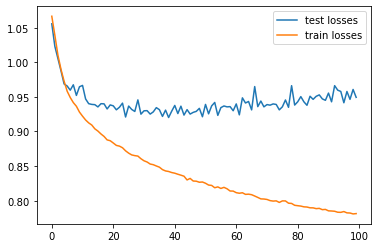

100%|██████████| 1178/1178 [00:00<00:00, 3259.52it/s]


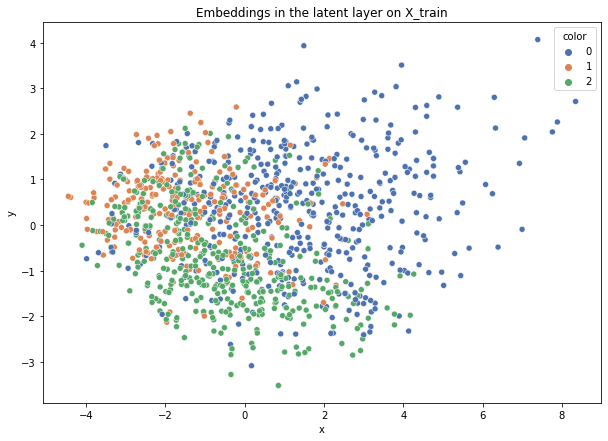

{'borderline-0': 0.12830957230142567, 'safe-0': 0.20095044127630685, 'rare-0': 0.06109979633401222, 'outlier-0': 0.03665987780040733, 'borderline-1': 0.09775967413441955, 'outlier-1': 0.03394433129667346, 'safe-1': 0.0373387644263408, 'rare-1': 0.05702647657841141, 'borderline-2': 0.15682281059063136, 'safe-2': 0.09843856076035302, 'outlier-2': 0.031228784792939578, 'rare-2': 0.06042090970807875}
{'borderline-0': 0.22606924643584522, 'rare-0': 0.09164969450101833, 'safe-0': 0.07942973523421588, 'outlier-0': 0.02987101154107264, 'safe-1': 0.028513238289205704, 'borderline-1': 0.10590631364562118, 'outlier-1': 0.04548540393754243, 'rare-1': 0.0461642905634759, 'rare-2': 0.0746775288526816, 'borderline-2': 0.1887304820095044, 'outlier-2': 0.027155465037338764, 'safe-2': 0.05634758995247793}
Softmax-f1: 0.528
Softmax-gmean: 0.515
dermatology


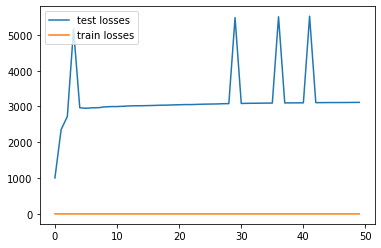

100%|██████████| 293/293 [00:00<00:00, 3099.30it/s]


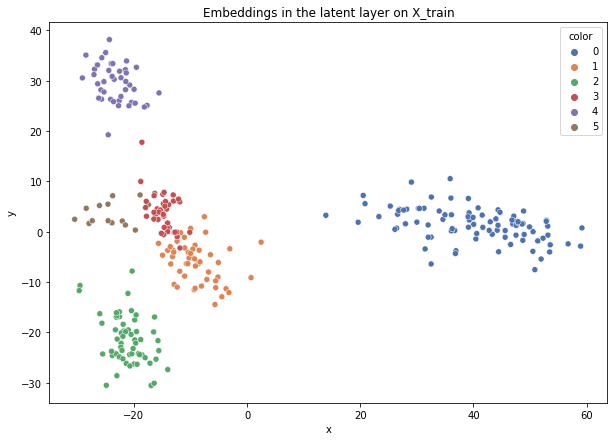

{'safe-1': 0.15846994535519127, 'safe-2': 0.19398907103825136, 'safe-0': 0.30601092896174864, 'safe-4': 0.14207650273224043, 'safe-3': 0.1284153005464481, 'safe-5': 0.0546448087431694, 'outlier-2': 0.00273224043715847, 'borderline-3': 0.00273224043715847, 'borderline-1': 0.00273224043715847, 'outlier-3': 0.00273224043715847, 'outlier-1': 0.00273224043715847, 'rare-1': 0.00273224043715847}
{'borderline-1': 0.06284153005464481, 'safe-2': 0.17486338797814208, 'safe-0': 0.23770491803278687, 'safe-1': 0.09562841530054644, 'safe-4': 0.13387978142076504, 'safe-3': 0.10655737704918032, 'borderline-5': 0.02185792349726776, 'borderline-0': 0.04371584699453552, 'borderline-3': 0.0273224043715847, 'rare-1': 0.00819672131147541, 'rare-5': 0.00546448087431694, 'outlier-0': 0.01366120218579235, 'borderline-4': 0.00819672131147541, 'rare-0': 0.01092896174863388, 'safe-5': 0.0273224043715847, 'borderline-2': 0.01639344262295082, 'outlier-2': 0.00273224043715847, 'rare-2': 0.00273224043715847}
Softmax-f

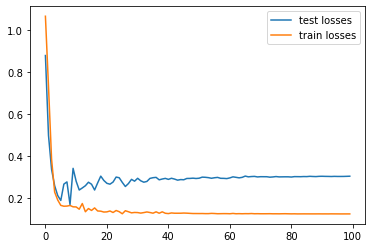

100%|██████████| 128/128 [00:00<00:00, 2984.47it/s]


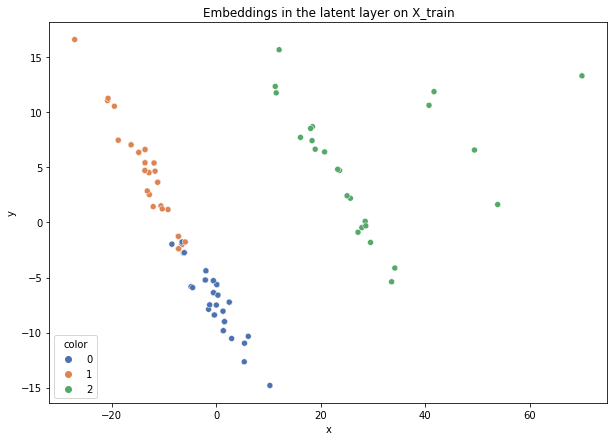

{'safe-0': 0.325, 'borderline-1': 0.0875, 'safe-2': 0.19375, 'safe-1': 0.3, 'borderline-0': 0.08125, 'rare-1': 0.0125}
{'borderline-0': 0.29375, 'borderline-1': 0.3, 'safe-2': 0.125, 'safe-0': 0.10625, 'borderline-2': 0.06875, 'safe-1': 0.075, 'rare-1': 0.025, 'rare-0': 0.00625}
Softmax-f1: 0.872
Softmax-gmean: 0.867
new_vehicle


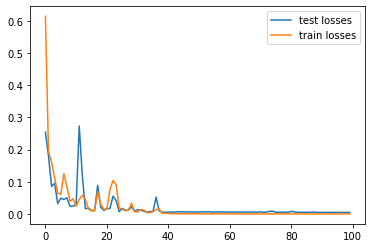

100%|██████████| 677/677 [00:00<00:00, 2945.67it/s]


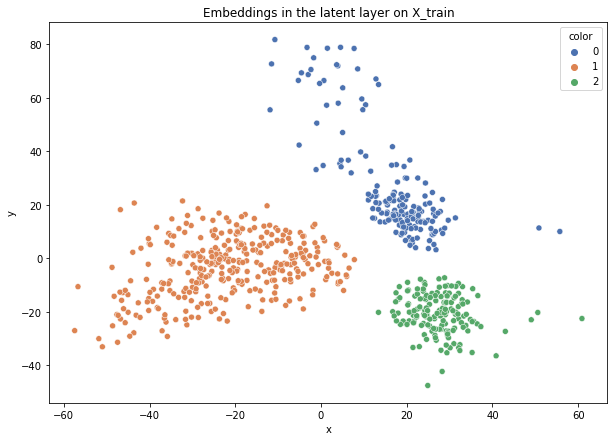

{'safe-2': 0.23522458628841608, 'safe-1': 0.5059101654846335, 'safe-0': 0.2565011820330969, 'borderline-1': 0.001182033096926714, 'borderline-0': 0.001182033096926714}
{'safe-2': 0.17375886524822695, 'safe-1': 0.4373522458628842, 'rare-0': 0.00591016548463357, 'safe-0': 0.23286052009456265, 'borderline-2': 0.05319148936170213, 'borderline-1': 0.054373522458628844, 'rare-1': 0.014184397163120567, 'borderline-0': 0.018912529550827423, 'rare-2': 0.00591016548463357, 'outlier-1': 0.001182033096926714, 'outlier-2': 0.002364066193853428}
Softmax-f1: 1.0
Softmax-gmean: 1.0
new_yeast


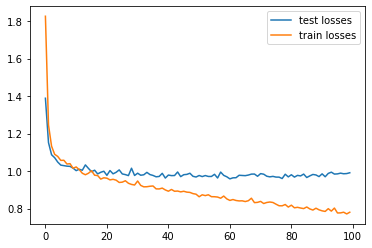

100%|██████████| 1187/1187 [00:00<00:00, 3134.36it/s]


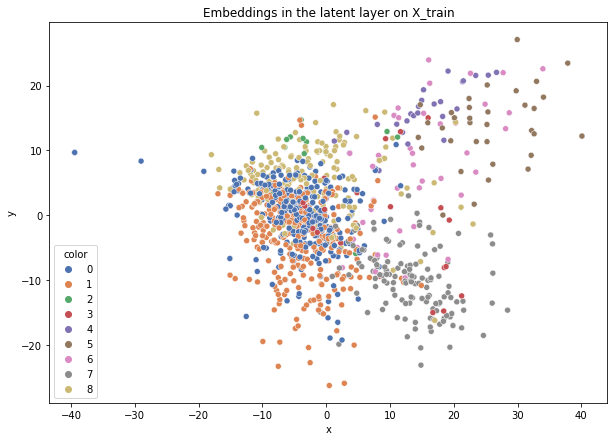

{'borderline-1': 0.1280323450134771, 'safe-8': 0.06064690026954178, 'outlier-0': 0.024932614555256066, 'borderline-0': 0.14892183288409702, 'borderline-8': 0.05727762803234501, 'safe-0': 0.09703504043126684, 'rare-0': 0.04110512129380054, 'borderline-5': 0.012803234501347708, 'rare-6': 0.00876010781671159, 'borderline-6': 0.014824797843665768, 'safe-7': 0.0761455525606469, 'outlier-3': 0.013477088948787063, 'outlier-4': 0.004043126684636119, 'outlier-7': 0.007412398921832884, 'borderline-4': 0.006738544474393531, 'outlier-8': 0.022911051212938006, 'rare-8': 0.02358490566037736, 'safe-1': 0.08288409703504043, 'borderline-2': 0.0013477088948787063, 'rare-1': 0.04514824797843666, 'outlier-1': 0.0330188679245283, 'safe-2': 0.006064690026954178, 'safe-4': 0.009433962264150943, 'borderline-3': 0.0006738544474393531, 'borderline-7': 0.022911051212938006, 'outlier-6': 0.010107816711590296, 'safe-5': 0.012129380053908356, 'rare-7': 0.006738544474393531, 'outlier-2': 0.006064690026954178, 'rare-

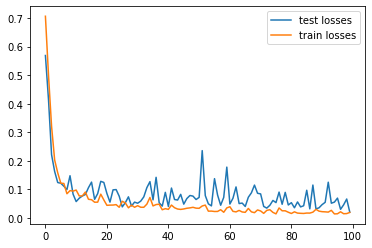

100%|██████████| 960/960 [00:00<00:00, 3085.23it/s]


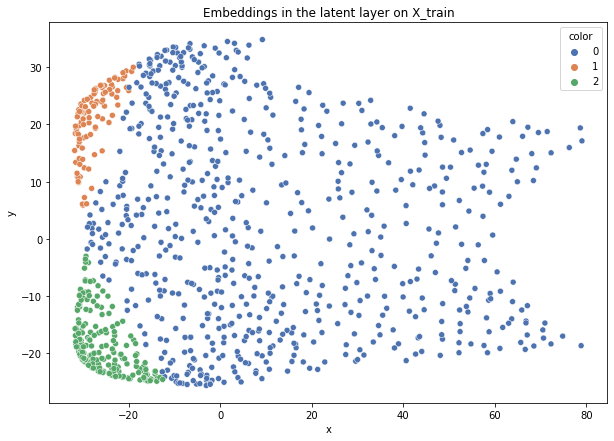

{'safe-1': 0.09, 'borderline-1': 0.009166666666666667, 'safe-0': 0.6833333333333333, 'borderline-0': 0.014166666666666666, 'rare-0': 0.0025, 'safe-2': 0.1975, 'borderline-2': 0.0025, 'rare-1': 0.0008333333333333334}
{'safe-1': 0.08666666666666667, 'borderline-1': 0.013333333333333334, 'safe-0': 0.665, 'rare-0': 0.0075, 'borderline-0': 0.0275, 'safe-2': 0.19, 'borderline-2': 0.01}
Softmax-f1: 0.987
Softmax-gmean: 0.984
2delikatne-cut


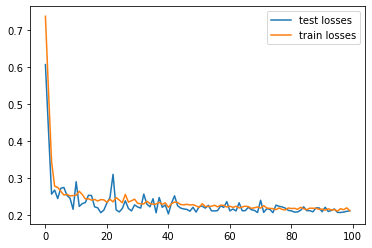

100%|██████████| 960/960 [00:00<00:00, 3260.99it/s]


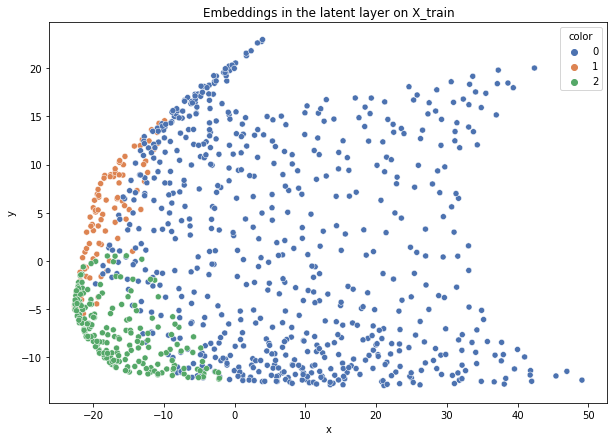

{'rare-1': 0.015833333333333335, 'borderline-1': 0.035, 'outlier-1': 0.008333333333333333, 'safe-1': 0.04083333333333333, 'safe-0': 0.61, 'borderline-0': 0.07583333333333334, 'rare-0': 0.011666666666666667, 'outlier-0': 0.0025, 'rare-2': 0.014166666666666666, 'borderline-2': 0.0675, 'outlier-2': 0.0033333333333333335, 'safe-2': 0.115}
{'outlier-1': 0.0125, 'rare-1': 0.021666666666666667, 'borderline-1': 0.028333333333333332, 'safe-1': 0.0375, 'safe-0': 0.6075, 'borderline-0': 0.07916666666666666, 'rare-0': 0.010833333333333334, 'outlier-0': 0.0025, 'outlier-2': 0.004166666666666667, 'borderline-2': 0.07, 'rare-2': 0.0175, 'safe-2': 0.10833333333333334}
Softmax-f1: 0.819
Softmax-gmean: 0.777
3mocniej-cut


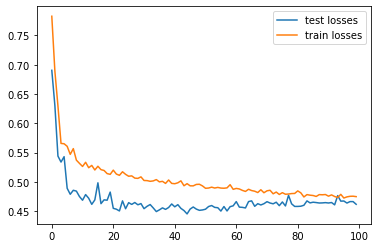

100%|██████████| 960/960 [00:00<00:00, 3236.26it/s]


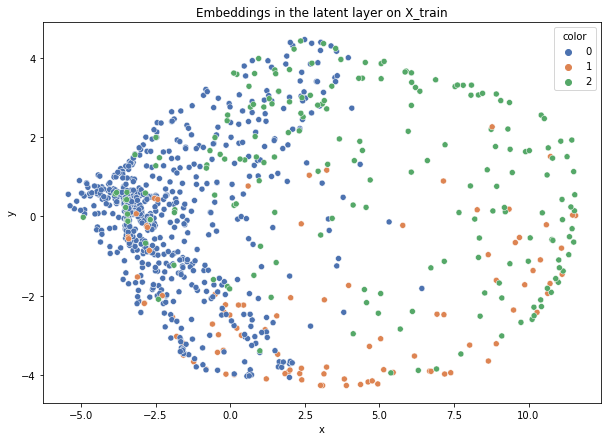

{'rare-1': 0.03666666666666667, 'outlier-1': 0.020833333333333332, 'borderline-1': 0.024166666666666666, 'safe-1': 0.018333333333333333, 'safe-0': 0.5316666666666666, 'borderline-0': 0.15666666666666668, 'rare-0': 0.0075, 'outlier-0': 0.004166666666666667, 'borderline-2': 0.06916666666666667, 'rare-2': 0.04666666666666667, 'outlier-2': 0.023333333333333334, 'safe-2': 0.060833333333333336}
{'outlier-1': 0.025, 'borderline-1': 0.025833333333333333, 'rare-1': 0.035, 'safe-1': 0.014166666666666666, 'safe-0': 0.5058333333333334, 'borderline-0': 0.18666666666666668, 'rare-0': 0.006666666666666667, 'outlier-0': 0.0008333333333333334, 'borderline-2': 0.08, 'rare-2': 0.0525, 'outlier-2': 0.02, 'safe-2': 0.0475}
Softmax-f1: 0.687
Softmax-gmean: 0.584
4delikatne-bezover-cut


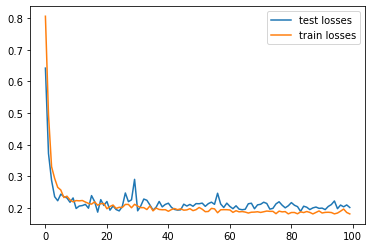

100%|██████████| 960/960 [00:00<00:00, 3262.92it/s]


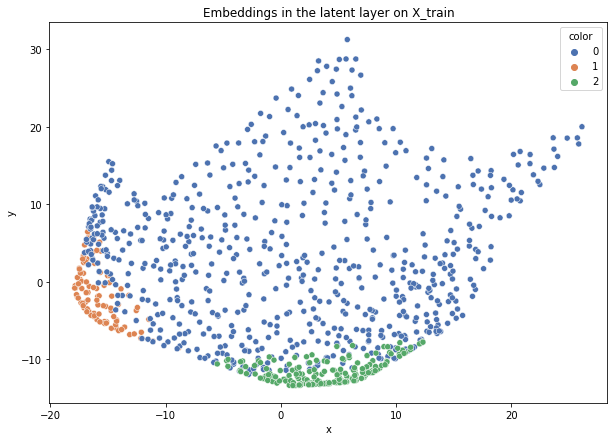

{'outlier-1': 0.006666666666666667, 'rare-1': 0.015, 'borderline-1': 0.010833333333333334, 'safe-1': 0.0675, 'borderline-0': 0.0875, 'safe-0': 0.5941666666666666, 'rare-0': 0.016666666666666666, 'outlier-0': 0.0016666666666666668, 'safe-2': 0.14416666666666667, 'borderline-2': 0.04583333333333333, 'rare-2': 0.009166666666666667, 'outlier-2': 0.0008333333333333334}
{'outlier-1': 0.01, 'rare-1': 0.01, 'borderline-1': 0.024166666666666666, 'safe-1': 0.05583333333333333, 'borderline-0': 0.0925, 'safe-0': 0.5841666666666666, 'outlier-0': 0.004166666666666667, 'rare-0': 0.019166666666666665, 'borderline-2': 0.045, 'safe-2': 0.13833333333333334, 'rare-2': 0.014166666666666666, 'outlier-2': 0.0025}
Softmax-f1: 0.861
Softmax-gmean: 0.846
balance-scale


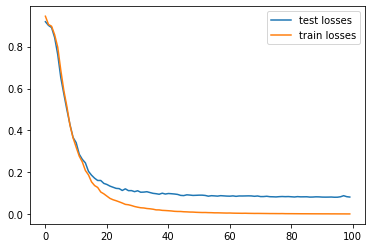

100%|██████████| 500/500 [00:00<00:00, 2639.22it/s]


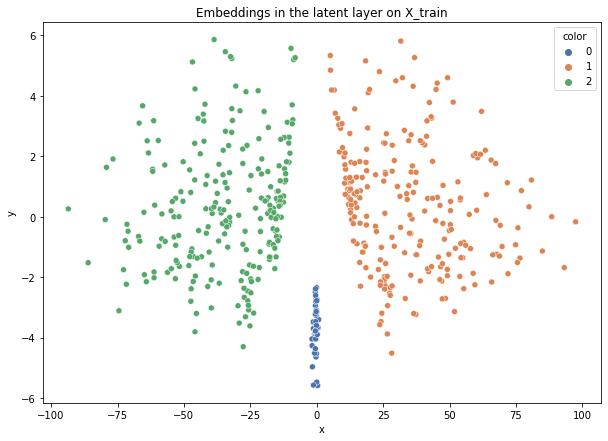

{'safe-0': 0.0752, 'safe-2': 0.456, 'safe-1': 0.4576, 'rare-0': 0.0032, 'borderline-2': 0.0032, 'rare-1': 0.0016, 'rare-2': 0.0016, 'borderline-1': 0.0016}
{'outlier-0': 0.0752, 'rare-2': 0.0576, 'safe-2': 0.0992, 'borderline-2': 0.296, 'borderline-1': 0.3056, 'safe-1': 0.0896, 'outlier-2': 0.008, 'outlier-1': 0.008, 'rare-1': 0.0576, 'rare-0': 0.0032}
Softmax-f1: 0.922
Softmax-gmean: 0.943
cleveland


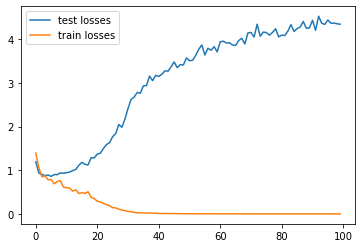

100%|██████████| 242/242 [00:00<00:00, 3185.10it/s]


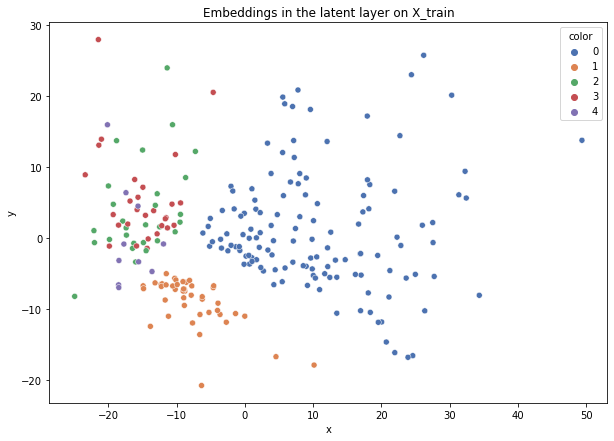

{'safe-0': 0.5115511551155115, 'safe-2': 0.08250825082508251, 'safe-1': 0.13861386138613863, 'borderline-1': 0.019801980198019802, 'safe-3': 0.066006600660066, 'borderline-4': 0.006600660066006601, 'borderline-0': 0.019801980198019802, 'borderline-3': 0.036303630363036306, 'safe-4': 0.0231023102310231, 'borderline-2': 0.019801980198019802, 'rare-1': 0.009900990099009901, 'rare-4': 0.006600660066006601, 'outlier-1': 0.013201320132013201, 'outlier-4': 0.006600660066006601, 'rare-0': 0.0033003300330033004, 'outlier-2': 0.0165016501650165, 'outlier-0': 0.006600660066006601, 'outlier-3': 0.006600660066006601, 'rare-3': 0.006600660066006601}
{'borderline-0': 0.10561056105610561, 'outlier-2': 0.0297029702970297, 'rare-1': 0.07260726072607261, 'safe-0': 0.39603960396039606, 'rare-0': 0.033003300330033, 'borderline-2': 0.0165016501650165, 'rare-2': 0.07260726072607261, 'outlier-1': 0.0297029702970297, 'rare-3': 0.0462046204620462, 'outlier-4': 0.033003300330033, 'borderline-3': 0.03300330033003

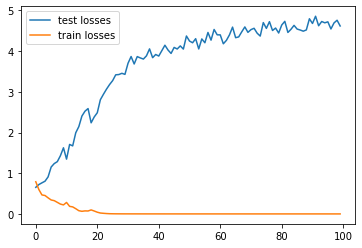

100%|██████████| 242/242 [00:00<00:00, 3035.05it/s]


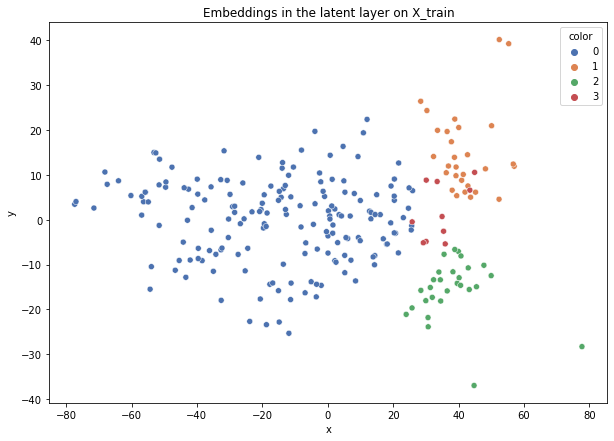

{'safe-0': 0.6963696369636964, 'safe-1': 0.07920792079207921, 'safe-2': 0.09900990099009901, 'safe-3': 0.0297029702970297, 'borderline-1': 0.019801980198019802, 'borderline-3': 0.0033003300330033004, 'rare-0': 0.0165016501650165, 'outlier-1': 0.0165016501650165, 'rare-3': 0.0033003300330033004, 'outlier-0': 0.0033003300330033004, 'outlier-2': 0.0165016501650165, 'borderline-0': 0.006600660066006601, 'rare-1': 0.0033003300330033004, 'outlier-3': 0.006600660066006601}
{'borderline-0': 0.08250825082508251, 'outlier-1': 0.0297029702970297, 'safe-0': 0.6138613861386139, 'rare-2': 0.04950495049504951, 'rare-1': 0.07260726072607261, 'outlier-3': 0.033003300330033, 'borderline-2': 0.033003300330033, 'rare-3': 0.009900990099009901, 'rare-0': 0.026402640264026403, 'outlier-2': 0.033003300330033, 'borderline-1': 0.0165016501650165}
Softmax-f1: 0.308
Softmax-gmean: 0.076
glass


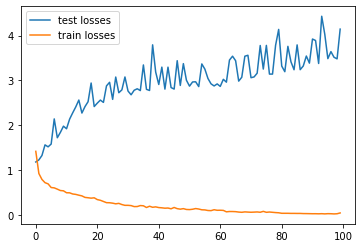

100%|██████████| 171/171 [00:00<00:00, 3072.87it/s]


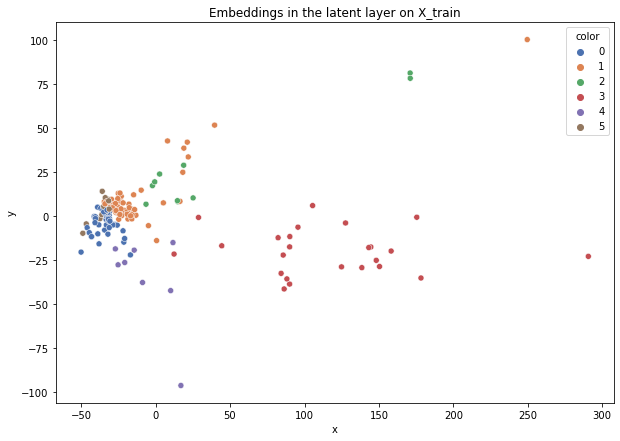

{'borderline-5': 0.03271028037383177, 'borderline-4': 0.018691588785046728, 'safe-1': 0.2757009345794392, 'borderline-1': 0.06542056074766354, 'safe-0': 0.24299065420560748, 'safe-3': 0.11682242990654206, 'rare-5': 0.02336448598130841, 'safe-5': 0.018691588785046728, 'safe-2': 0.03271028037383177, 'borderline-2': 0.028037383177570093, 'safe-4': 0.02336448598130841, 'borderline-0': 0.07009345794392523, 'rare-3': 0.004672897196261682, 'rare-0': 0.014018691588785047, 'outlier-1': 0.004672897196261682, 'outlier-3': 0.009345794392523364, 'rare-1': 0.009345794392523364, 'borderline-3': 0.004672897196261682, 'outlier-5': 0.004672897196261682}
{'outlier-5': 0.02336448598130841, 'outlier-4': 0.004672897196261682, 'safe-1': 0.16355140186915887, 'borderline-1': 0.12149532710280374, 'rare-5': 0.037383177570093455, 'safe-0': 0.18691588785046728, 'safe-3': 0.102803738317757, 'borderline-2': 0.028037383177570093, 'outlier-1': 0.014018691588785047, 'rare-1': 0.056074766355140186, 'rare-0': 0.018691588

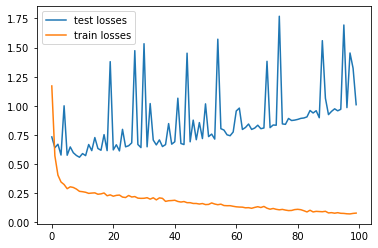

100%|██████████| 269/269 [00:00<00:00, 3211.82it/s]


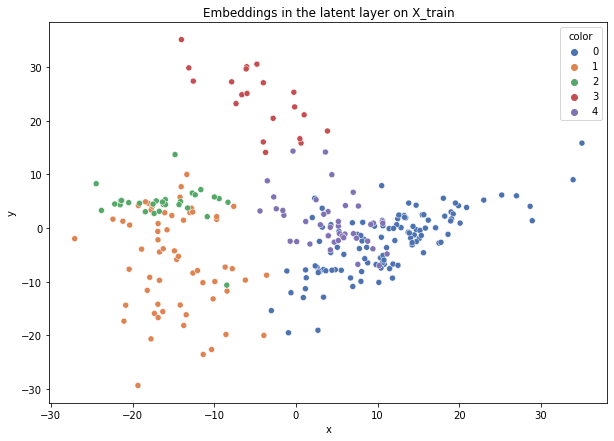

{'safe-0': 0.4226190476190476, 'outlier-0': 0.008928571428571428, 'safe-1': 0.17559523809523808, 'outlier-1': 0.002976190476190476, 'rare-1': 0.005952380952380952, 'borderline-1': 0.044642857142857144, 'safe-2': 0.047619047619047616, 'borderline-2': 0.050595238095238096, 'rare-2': 0.008928571428571428, 'safe-3': 0.06845238095238096, 'borderline-3': 0.002976190476190476, 'safe-4': 0.13095238095238096, 'borderline-4': 0.011904761904761904, 'outlier-4': 0.011904761904761904, 'outlier-2': 0.002976190476190476, 'outlier-3': 0.002976190476190476}
{'safe-0': 0.4107142857142857, 'borderline-0': 0.008928571428571428, 'outlier-0': 0.008928571428571428, 'safe-1': 0.11904761904761904, 'outlier-1': 0.01488095238095238, 'borderline-1': 0.07738095238095238, 'rare-1': 0.017857142857142856, 'outlier-2': 0.017857142857142856, 'borderline-2': 0.05952380952380952, 'safe-2': 0.026785714285714284, 'rare-2': 0.005952380952380952, 'safe-3': 0.05654761904761905, 'borderline-3': 0.011904761904761904, 'rare-3': 

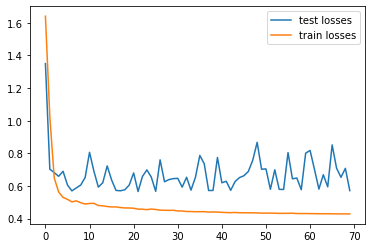

100%|██████████| 400/400 [00:00<00:00, 3110.01it/s]


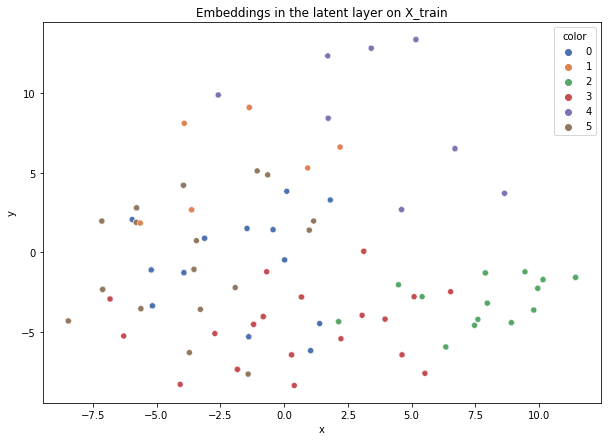

{'borderline-0': 0.04, 'safe-0': 0.132, 'safe-2': 0.16, 'borderline-2': 0.01, 'safe-3': 0.15, 'rare-3': 0.01, 'outlier-3': 0.022, 'safe-4': 0.074, 'borderline-4': 0.026, 'safe-5': 0.16, 'borderline-5': 0.03, 'outlier-0': 0.014, 'outlier-1': 0.014, 'borderline-1': 0.074, 'borderline-3': 0.034, 'outlier-5': 0.006, 'rare-2': 0.016, 'rare-1': 0.01, 'rare-0': 0.01, 'rare-4': 0.002, 'rare-5': 0.002, 'outlier-2': 0.002, 'outlier-4': 0.002}
{'borderline-0': 0.048, 'safe-0': 0.122, 'safe-2': 0.144, 'borderline-2': 0.03, 'safe-3': 0.144, 'borderline-3': 0.044, 'outlier-3': 0.008, 'safe-4': 0.08, 'borderline-4': 0.014, 'borderline-5': 0.03, 'safe-5': 0.15, 'outlier-0': 0.01, 'outlier-1': 0.014, 'borderline-1': 0.064, 'rare-4': 0.01, 'outlier-5': 0.01, 'rare-0': 0.016, 'rare-1': 0.02, 'rare-2': 0.006, 'rare-3': 0.02, 'outlier-2': 0.008, 'rare-5': 0.008}
Softmax-f1: 0.764
Softmax-gmean: 0.724
new_winequality-red


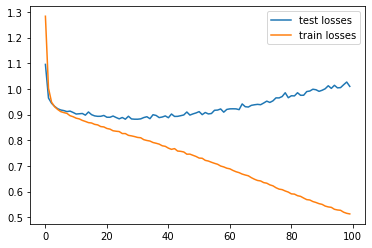

100%|██████████| 1279/1279 [00:00<00:00, 3153.36it/s]


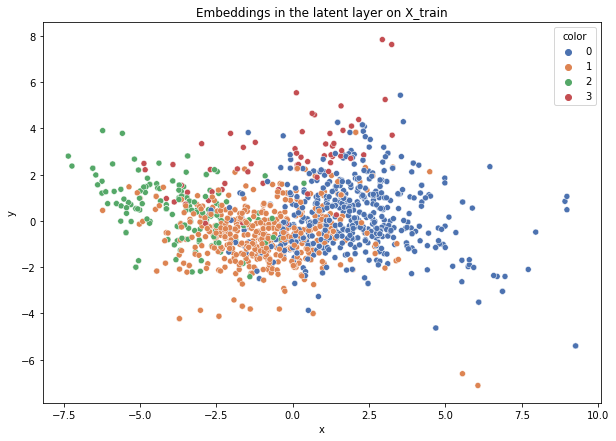

{'safe-0': 0.275797373358349, 'safe-1': 0.21263289555972484, 'borderline-0': 0.10006253908692933, 'outlier-2': 0.017510944340212633, 'outlier-3': 0.01938711694809256, 'rare-1': 0.04252657911194497, 'rare-0': 0.0300187617260788, 'borderline-1': 0.1207004377736085, 'borderline-3': 0.0150093808630394, 'rare-2': 0.014383989993746092, 'outlier-0': 0.020012507817385866, 'rare-3': 0.0150093808630394, 'outlier-1': 0.023139462163852407, 'safe-2': 0.054409005628517824, 'borderline-2': 0.03814884302689181, 'safe-3': 0.0012507817385866166}
{'safe-0': 0.18261413383364603, 'rare-1': 0.06441525953721075, 'borderline-0': 0.1651031894934334, 'outlier-2': 0.016885553470919325, 'rare-0': 0.05065666041275797, 'outlier-3': 0.031269543464665414, 'borderline-1': 0.20200125078173858, 'outlier-1': 0.023139462163852407, 'outlier-0': 0.027517198248905566, 'safe-1': 0.10944340212632896, 'rare-3': 0.013758599124452783, 'borderline-3': 0.0050031269543464665, 'rare-2': 0.03877423389618512, 'borderline-2': 0.04252657

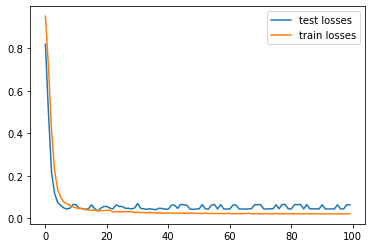

100%|██████████| 172/172 [00:00<00:00, 3094.95it/s]


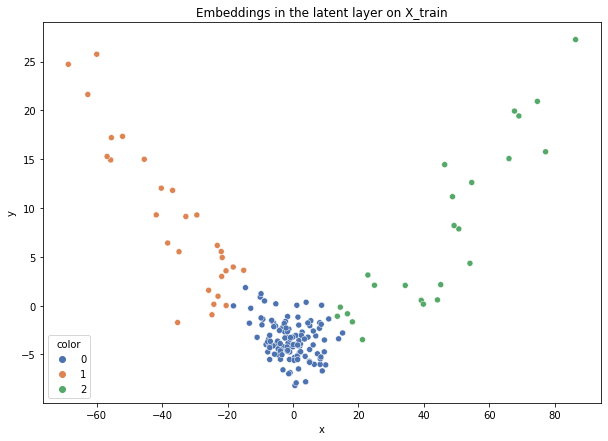

{'safe-0': 0.6790697674418604, 'rare-0': 0.009302325581395349, 'borderline-0': 0.009302325581395349, 'safe-1': 0.15348837209302327, 'borderline-1': 0.004651162790697674, 'safe-2': 0.12093023255813953, 'borderline-2': 0.018604651162790697, 'rare-1': 0.004651162790697674}
{'safe-0': 0.6744186046511628, 'borderline-0': 0.023255813953488372, 'borderline-1': 0.05116279069767442, 'safe-1': 0.11162790697674418, 'safe-2': 0.10232558139534884, 'outlier-2': 0.009302325581395349, 'borderline-2': 0.013953488372093023, 'rare-2': 0.013953488372093023}
Softmax-f1: 0.969
Softmax-gmean: 0.95


In [35]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
    print(dataset_name)
    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    for train_index, test_index in list(skf.split(X, y))[1:2]: # Only one fold.
        y_train, y_test = y[train_index], y[test_index]
        # Get one-hot encoded representation
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)

        # Train softmax classifier
        cfg = config[dataset_name]
        model = ex.train_classification(X_train_enc, y_train, X_test_enc, y_test, cfg)
        
        # Visualize embeddings
        dataset1 = TensorDataset(torch.Tensor(X_train_enc), torch.Tensor(y_train))
        test_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=1)
        embeddings, labels = calc_embeddings(model, device, test_loader1)
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings), y_train)
        plt.title("Embeddings in the latent layer on X_train")
        plt.show() 
        
        # Prepare datasets and loaders for safety calculation
        dataset2 = TensorDataset(torch.Tensor(X_test_enc), torch.Tensor(y_test))
        test_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=1)
        
        dataset1 = TensorDataset(torch.Tensor(X_train_enc), torch.Tensor(y_train))
        test_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=1)
        
        preds = []
        model.eval()
        embeddings_test = []
        with torch.no_grad():
            for data, target in test_loader2:
                data, target = data.to(device), target.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                preds.append(pred.item())
                embeddings_test.append(model.embed(data).cpu().numpy()[0])
#                 print(f"Pred: {pred.item()}, target: {target.item()}, output: {output}")

        embeddings_train = []
        with torch.no_grad():
            for data, target in test_loader1:
                data, target = data.to(device), target.to(device)
                embeddings_train.append(model.embed(data).cpu().numpy()[0])
                
        embeddings_all = np.array(embeddings_train + embeddings_test)
        y_all = np.hstack([y_train, y_test])

        s_dict = calc_mean_minority_safety5(embeddings_all, y_all, dataset_name)
        for k, v in s_dict.items():
            safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_mean_minority_safety5(np.vstack([X_train_enc, X_test_enc]), np.hstack([y_train, y_test]), dataset_name)
        for k,v in s_dict.items():
            safety_dict[f"raw-{k}"].append(v)
    
    
        clf_name = "Softmax"
        gmean = gmean_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')
        result_dict[f"{clf_name}-f1"].append(f1)
        result_dict[f"{clf_name}-gmean"].append(gmean)
            
        
        for key in sorted(list(result_dict.keys())):
            print(f"{key}: {np.round(result_dict[key][-1],3)}")

In [36]:
results_df = pd.DataFrame.from_dict(result_dict)

In [37]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [38]:
results_df

,Softmax-f1,Softmax-gmean
0,0.528195,0.515477
1,0.926645,0.923182
2,0.871605,0.866633
3,1.000000,1.000000
4,0.594014,0.314346
5,0.987487,0.983954
6,0.819409,0.776808
7,0.686687,0.584314
8,0.860991,0.846377
9,0.921849,0.942968


In [39]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,emb-safe
0,0.037339
1,0.054645
2,0.193750
3,0.245863
4,0.005660
5,0.143750
6,0.077917
7,0.039583
8,0.105833
9,0.075200


In [40]:
safety_df

,emb-safe,raw-safe
0,0.037339,0.028513
1,0.054645,0.027322
2,0.193750,0.125000
3,0.245863,0.203310
4,0.005660,0.005256
5,0.143750,0.138333
6,0.077917,0.072917
7,0.039583,0.030833
8,0.105833,0.097083
9,0.075200,0.000000


In [41]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,raw-safe
0,0.028513
1,0.027322
2,0.125000
3,0.203310
4,0.005256
5,0.138333
6,0.072917
7,0.030833
8,0.097083
9,0.000000


In [42]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,emb-safe,raw-safe
0,0.037339,0.028513
1,0.054645,0.027322
2,0.193750,0.125000
3,0.245863,0.203310
4,0.005660,0.005256
5,0.143750,0.138333
6,0.077917,0.072917
7,0.039583,0.030833
8,0.105833,0.097083
9,0.075200,0.000000


In [43]:
results_df.filter(regex=("dataset|Softmax-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,Softmax-f1
0,0.528195
1,0.926645
2,0.871605
3,1.000000
4,0.594014
5,0.987487
6,0.819409
7,0.686687
8,0.860991
9,0.921849


In [44]:
results_df.filter(regex=("dataset|Softmax-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,Softmax-gmean
0,0.515477
1,0.923182
2,0.866633
3,1.000000
4,0.314346
5,0.983954
6,0.776808
7,0.584314
8,0.846377
9,0.942968
